# Predicting Quality of Sleep Based on Lifestyle Factors


### Step 1: Data Collection and Initial Exploration

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

file_path = r'C:\Users\wailb\Desktop\FINAL PROJECT\Sleep_health_and_lifestyle_dataset.csv'
data = pd.read_csv(file_path)

In [2]:
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [5]:
# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


### Step 2: Data Cleaning/Preprocessing

In [6]:
# Dropping Blood Pressure column
data = data.drop(columns=['Blood Pressure'])

# Filling missing values in 'Sleep Disorder' with 'None'
data['Sleep Disorder'].fillna('None', inplace=True)

# Imputing missing values for numerical columns with the mean
numerical_features = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
imputer = SimpleImputer(strategy='mean')
data[numerical_features] = imputer.fit_transform(data[numerical_features])

# Handling outliers using Z-score
z_scores = np.abs(zscore(data.select_dtypes(include=[np.number])))
data_clean = data[(z_scores < 3).all(axis=1)]

# Encoding categorical variables
label_encoders = {}
for column in ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Normalizing numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,-1.753096,9,-1.298887,6,-0.825418,0.347021,3,1.654719,-1.619584,1
1,2,1,-1.637643,1,-1.173036,6,0.039844,1.475592,0,1.170474,1.970077,1
2,3,1,-1.637643,1,-1.173036,6,0.039844,1.475592,0,1.170474,1.970077,1
3,4,1,-1.637643,6,-1.550588,4,-1.402260,1.475592,2,3.591698,-2.362273,2
4,5,1,-1.637643,6,-1.550588,4,-1.402260,1.475592,2,3.591698,-2.362273,2


* Gender:
    - 0: Female
    - 1: Male
___

### Step 3: Exploratory Data Analysis (EDA)

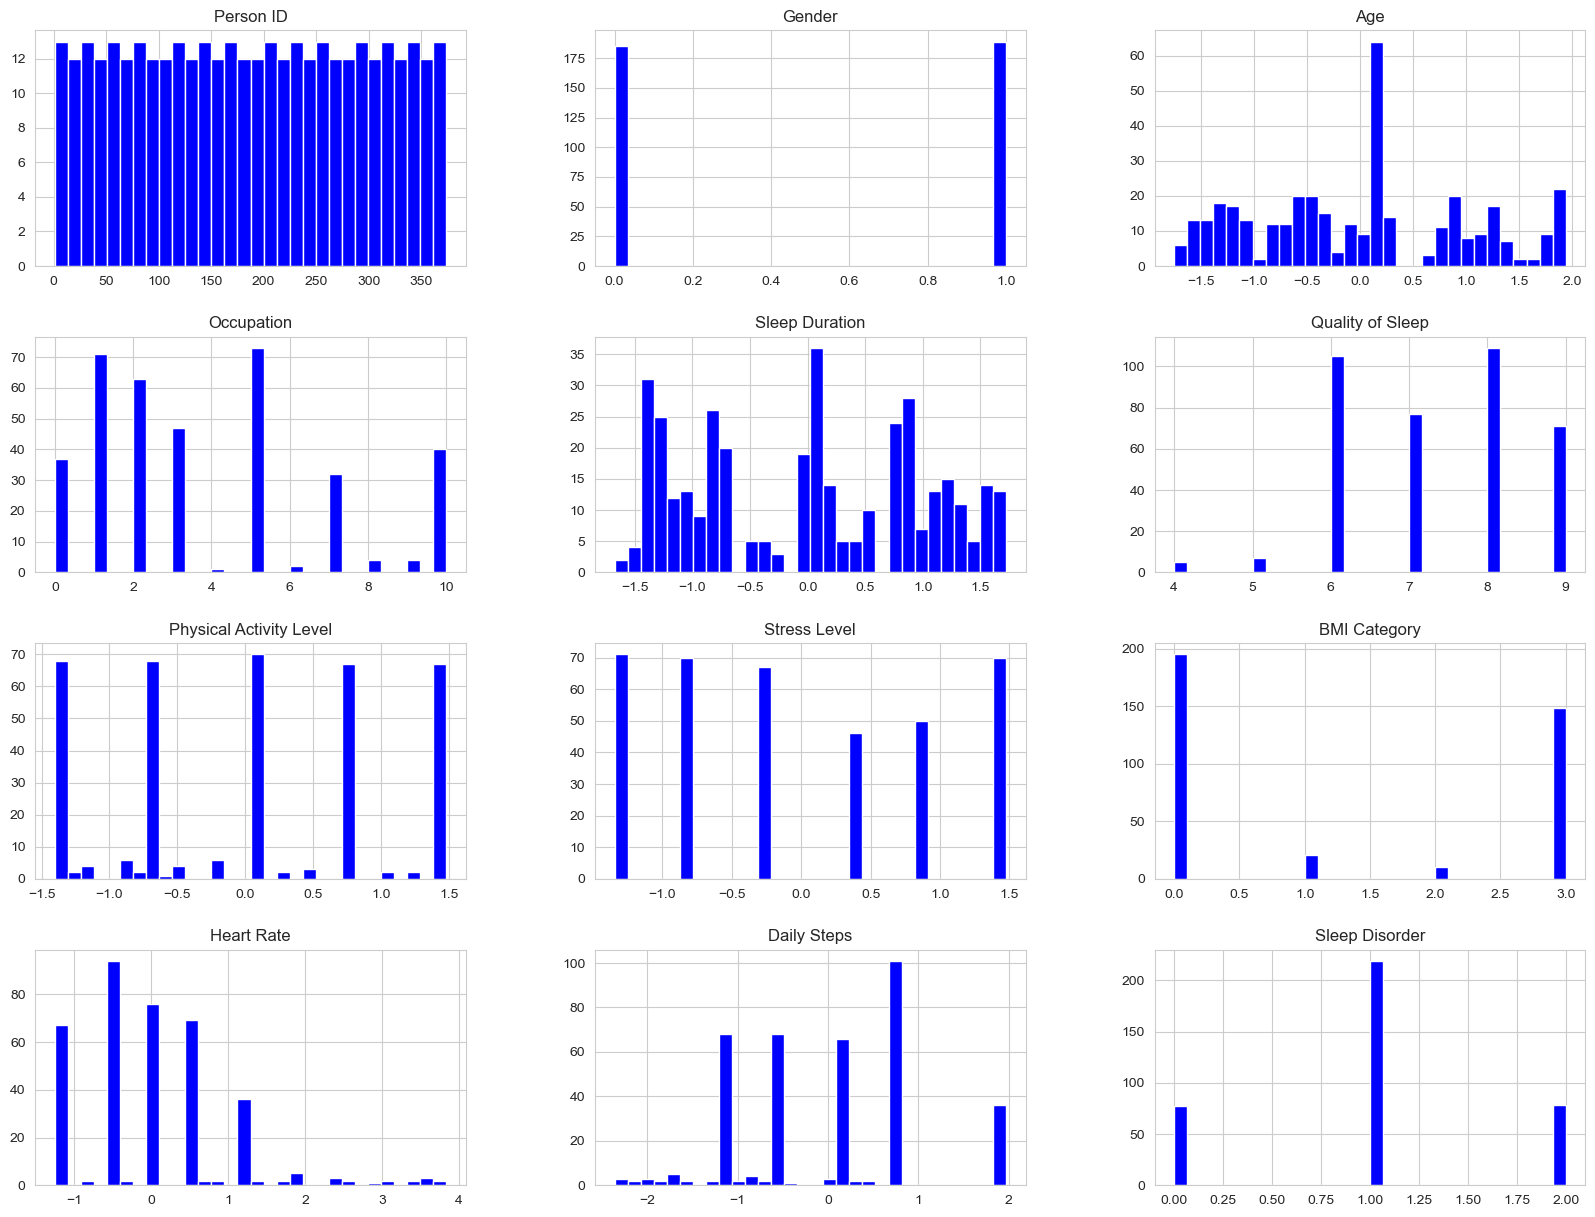

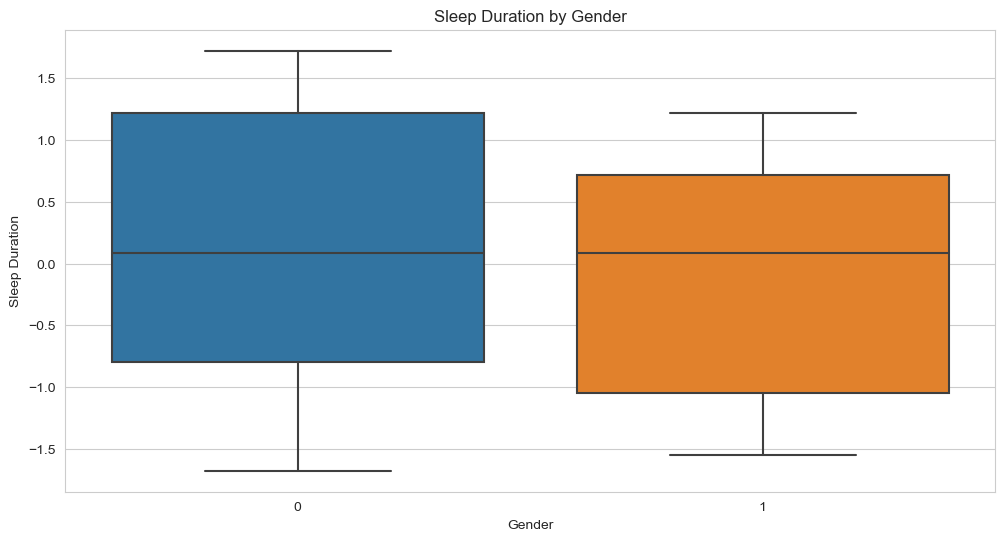

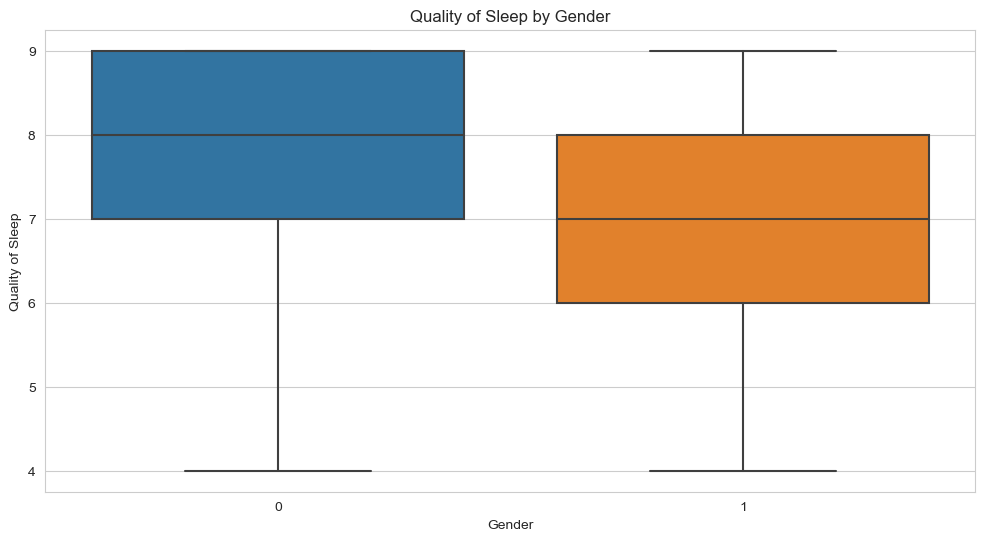

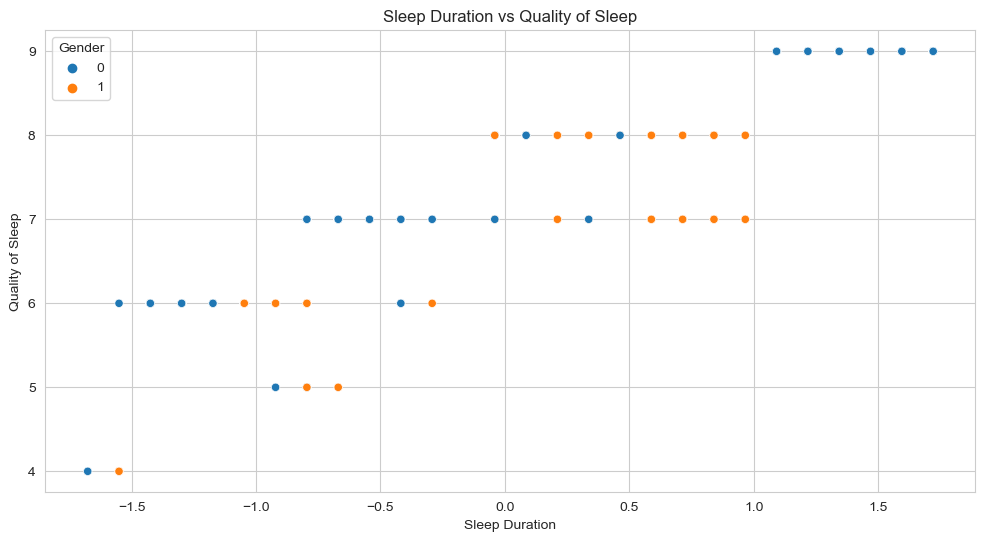

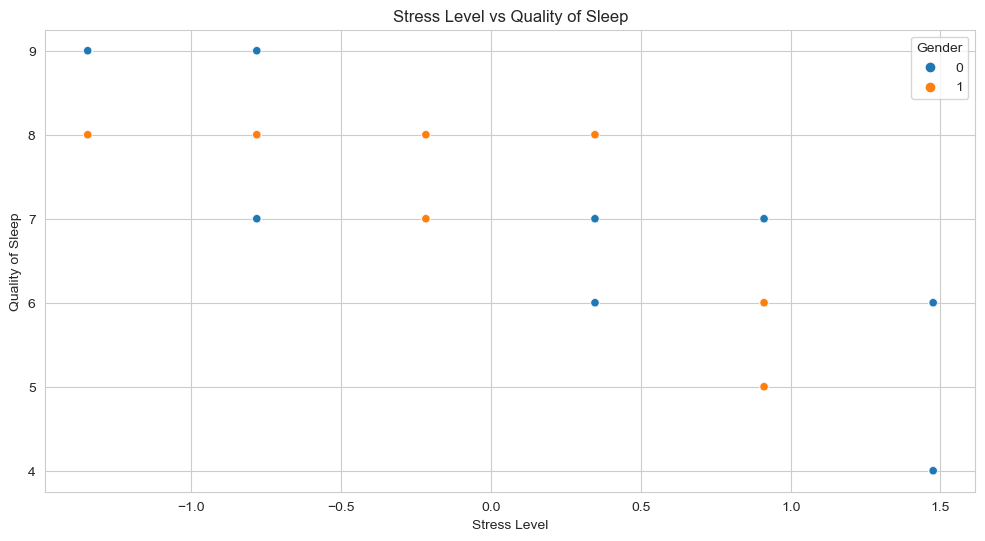

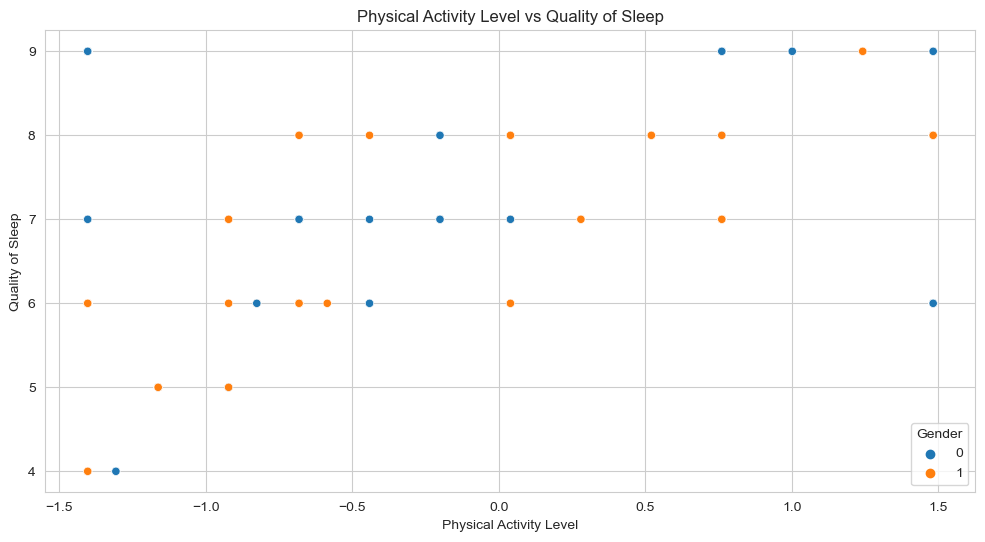

In [7]:
# Histograms for numerical columns
sns.set_style('whitegrid')
data.hist(bins=30, figsize=(20, 15), color='blue')
plt.show()

# Box plots for sleep duration and quality of sleep by gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Sleep Duration', data=data)
plt.title('Sleep Duration by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Quality of Sleep', data=data)
plt.title('Quality of Sleep by Gender')
plt.show()

# Scatter plots to explore relationships
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', hue='Gender', data=data)
plt.title('Sleep Duration vs Quality of Sleep')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Stress Level', y='Quality of Sleep', hue='Gender', data=data)
plt.title('Stress Level vs Quality of Sleep')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Physical Activity Level', y='Quality of Sleep', hue='Gender', data=data)
plt.title('Physical Activity Level vs Quality of Sleep')
plt.show()

### Step 4: Feature Engineering

In [8]:
# Applying PCA to reduce dimensionality
pca = PCA(n_components=0.95)
pca_features = pca.fit_transform(data[numerical_features])

# Create a new DataFrame with PCA features
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca_features.shape[1])])
data = pd.concat([data, pca_df], axis=1)

# Drop original numerical features if necessary
data = data.drop(columns=numerical_features)

### Step 5: Machine Learning & Model Development

In [9]:
# Splitting the data into training and test sets
X = data.drop(columns=['Person ID', 'Quality of Sleep'])
y = data['Quality of Sleep']

# Polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)

# Splitting the new features into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Applying Ridge regularization to the polynomial features
ridge_model = Ridge(alpha=12.0)
ridge_model.fit(X_train_poly, y_train_poly)

# Evaluating the Ridge model on the training set
ridge_predictions_train = ridge_model.predict(X_train_poly)
train_r2_ridge = r2_score(y_train_poly, ridge_predictions_train)
train_mae = mean_absolute_error(y_train_poly, ridge_predictions_train)
train_mse = mean_squared_error(y_train_poly, ridge_predictions_train)

print(f'Training Set Evaluation:')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'R-squared (R2): {train_r2_ridge}')

# Evaluating the Ridge model on the test set
ridge_predictions_test = ridge_model.predict(X_test_poly)
test_r2_ridge = r2_score(y_test_poly, ridge_predictions_test)
test_mae = mean_absolute_error(y_test_poly, ridge_predictions_test)
test_mse = mean_squared_error(y_test_poly, ridge_predictions_test)

print(f'Test Set Evaluation:')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'R-squared (R2): {test_r2_ridge}')

Training Set Evaluation:
Mean Absolute Error (MAE): 0.10257594062646072
Mean Squared Error (MSE): 0.029348702580180512
R-squared (R2): 0.978969531112272
Test Set Evaluation:
Mean Absolute Error (MAE): 0.10936454968730376
Mean Squared Error (MSE): 0.034749351766815664
R-squared (R2): 0.9769661673711598


___
Residual analysis


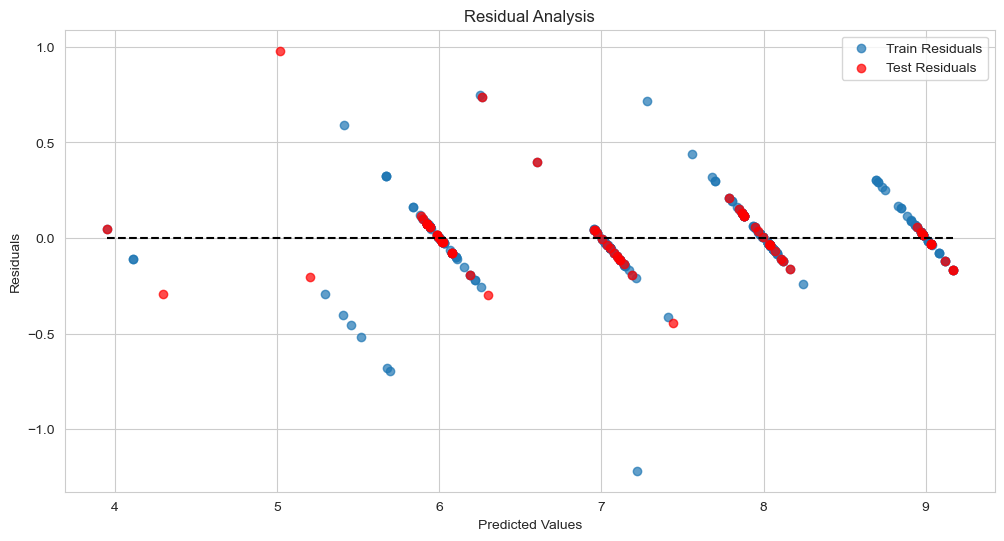

In [10]:
residuals_train = y_train_poly - ridge_model.predict(X_train_poly)
residuals_test = y_test_poly - ridge_model.predict(X_test_poly)

plt.figure(figsize=(12, 6))
plt.scatter(ridge_model.predict(X_train_poly), residuals_train, alpha=0.7, label='Train Residuals')
plt.scatter(ridge_model.predict(X_test_poly), residuals_test, alpha=0.7, label='Test Residuals', color='red')
plt.hlines(0, min(ridge_model.predict(X_train_poly)), max(ridge_model.predict(X_train_poly)), colors='black', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residual Analysis')
plt.show()

Feature importance

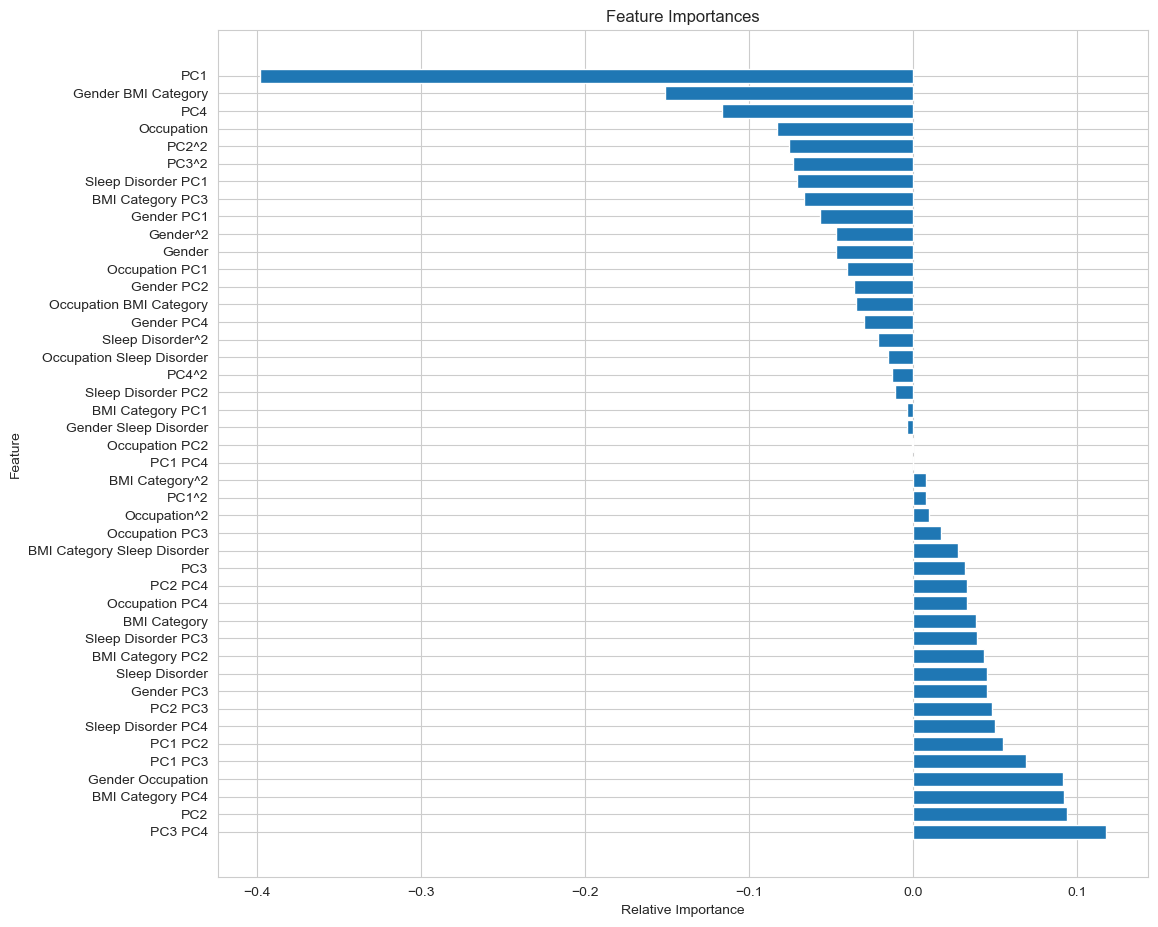

In [11]:
# Feature importance using coefficients
coefficients = ridge_model.coef_
feature_names = poly.get_feature_names_out(input_features=X.columns)

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 11))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

Actual vs Predicted Quality of Sleep

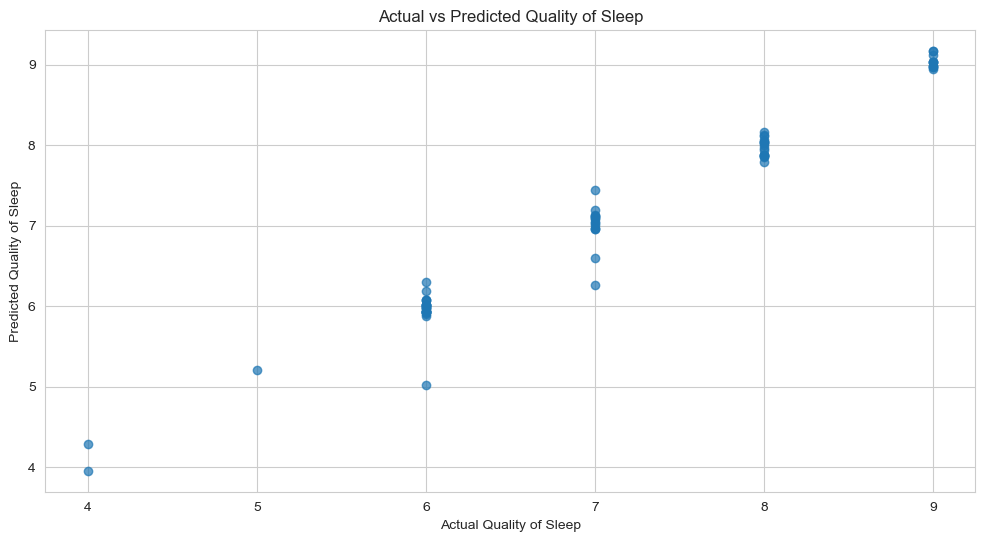

In [12]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test_poly, ridge_predictions_test, alpha=0.7)
plt.xlabel('Actual Quality of Sleep')
plt.ylabel('Predicted Quality of Sleep')
plt.title('Actual vs Predicted Quality of Sleep')
plt.show()

Correlation Matrix

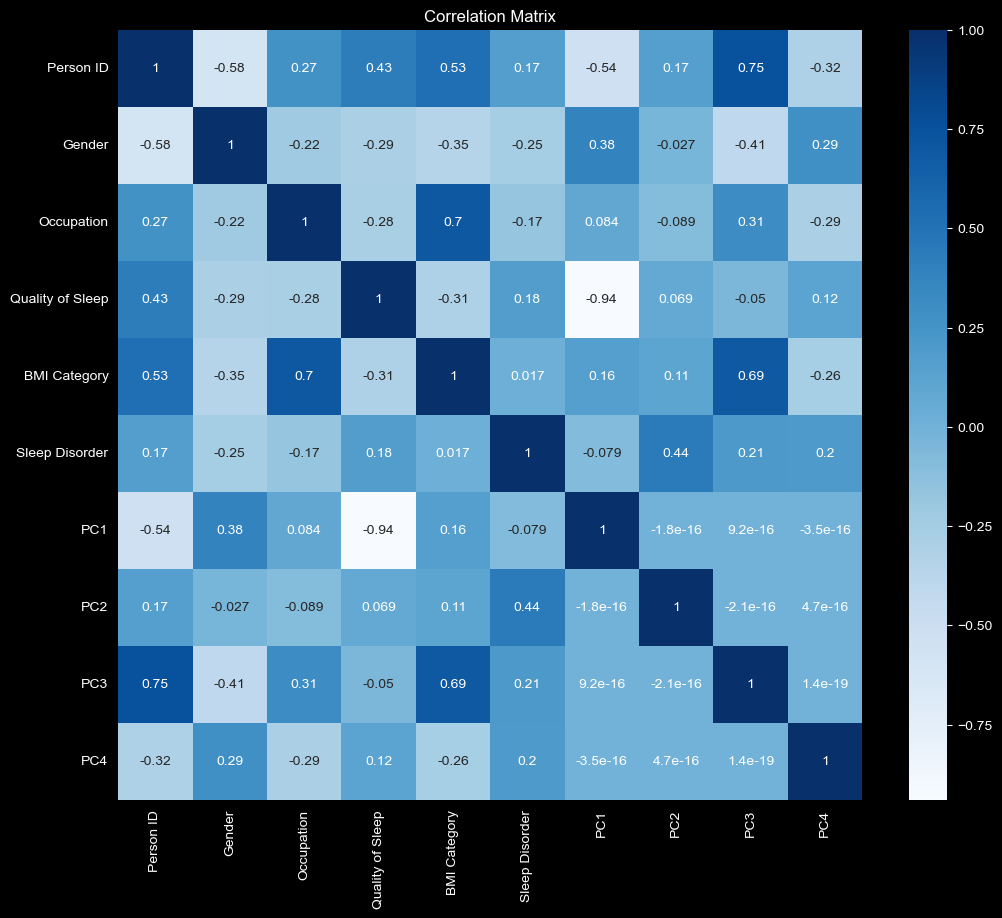

In [13]:
sns.set_style('dark')
plt.style.use('dark_background')

plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

### **_Key Insights_**:

**Correlation Analysis:**

* Features such as _Sleep Duration_, _Stress Level_, and _Heart Rate_ are crucial in determining the quality of sleep.
* Principal Component Analysis (PCA) is effective in capturing variance related to sleep quality, particularly PC1.

**Model Performace:**

* The model performs well, as shown by the alignment of actual and predicted sleep quality.
* The high importance of PC1 suggests PCA successfully reduced dimensionality while preserving relevant information.

**Feature Importance:**

* The most important features in determining sleep quality are _Sleep Duration_, _Stress Level_, and _Heart Rate_ similary to the correlation matrix.

**Residual Analysis:**

* Good distribution of residuals around zero, with no obvious patterns, indicating a well-fit model.

___
# Final Step: Predicting Sleep Quality

In [33]:
def get_closest_valid_choice(user_input, valid_choices):
    closest_choice = min(valid_choices, key=lambda x: abs(float(x) - float(user_input)))
    return closest_choice

def get_valid_input(prompt, valid_choices, is_numeric=False):
    while True:
        user_input = input(prompt)
        if user_input in valid_choices:
            return user_input
        elif is_numeric:
            closest_choice = get_closest_valid_choice(user_input, valid_choices)
            return closest_choice
        else:
            print(f"Please choose from the given options: {valid_choices}")

def predict_sleep_quality():
    # Valid choices for each input
    valid_ages = [str(i) for i in [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]]
    valid_genders = ['Male', 'Female']
    valid_occupations = ['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher', 'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer', 'Salesperson', 'Manager']
    valid_sleep_durations = [6.1, 6.2, 5.9, 6.3, 7.8, 6.0, 6.5, 7.6, 7.7, 7.9, 6.4, 7.5, 7.2, 5.8, 6.7, 7.3, 7.4, 7.1, 6.6, 6.9, 8.0, 6.8, 8.1, 8.3, 8.5, 8.4, 8.2]
    valid_physical_activities = [str(i) for i in range(0, 101)]
    valid_stress_levels = [str(i) for i in range(1, 11)]
    valid_bmi_categories = ['Underweight', 'Normal', 'Overweight', 'Obese']
    valid_heart_rates = [str(i) for i in range(50, 101)]
    valid_daily_steps = [4200, 10000, 3000, 3500, 8000, 4000, 4100, 6800, 5000, 7000, 5500, 5200, 5600, 3300, 4800, 7500, 7300, 6200, 6000, 3700]
    valid_sleep_disorders = ['None', 'Sleep Apnea', 'Insomnia']

    # Collect user inputs with validation
    age = float(get_valid_input("How old are you?", valid_ages, is_numeric=True))
    gender = get_valid_input("What's your gender? (Male / Female) ", valid_genders)
    occupation = get_valid_input("What's your occupation? (e.g., Teacher, Software Engineer, Doctor ) ", valid_occupations)
    sleep_duration = float(get_valid_input("How many hours do you sleep per day? ", valid_sleep_durations, is_numeric=True))
    physical_activity = get_valid_input("What's your physical activity level? (0-100) ", valid_physical_activities)
    stress_level = get_valid_input("What's your stress level? (1-10) ", valid_stress_levels)
    bmi_category = get_valid_input("What's your BMI category? (Underweight / Normal / Overweight / Obese) ", valid_bmi_categories)
    heart_rate = get_valid_input("What's your average heart rate? (e.g., 60, 70, 80) ", valid_heart_rates)
    daily_steps = float(get_valid_input("How many steps do you take daily? (e.g., 3000, 3500, ...) ", valid_daily_steps, is_numeric=True))
    sleep_disorder = get_valid_input("Do you have any sleep disorder? (None, Sleep Apnea, Insomnia) ", valid_sleep_disorders)

    # Encode categorical variables
    gender_encoded = np.array([label_encoders['Gender'].transform([gender])[0]]).reshape(1, -1)
    occupation_encoded = np.array([label_encoders['Occupation'].transform([occupation])[0]]).reshape(1, -1)
    bmi_category_encoded = np.array([label_encoders['BMI Category'].transform([bmi_category])[0]]).reshape(1, -1)
    sleep_disorder_encoded = np.array([label_encoders['Sleep Disorder'].transform([sleep_disorder])[0]]).reshape(1, -1)

    # Normalize numerical features
    input_data = scaler.transform([[float(age), sleep_duration, float(physical_activity), float(stress_level), float(heart_rate), daily_steps]])
    
    # Apply PCA transformation
    input_data_pca = pca.transform(input_data)
    
    # Combine all features
    combined_data = np.hstack([gender_encoded, occupation_encoded, bmi_category_encoded, sleep_disorder_encoded, input_data_pca])
    
    # Generate polynomial features
    input_data_poly = poly.transform(combined_data)

    # Predict sleep quality using the trained Ridge model
    predicted_quality = ridge_model.predict(input_data_poly)[0]
    
    print(f'Predicted Quality of Sleep: {predicted_quality}')


In [34]:
predict_sleep_quality()

Predicted Quality of Sleep: 7.366059600196653


___